In [1]:
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
x,y = make_regression(n_samples= 500,
                     n_features= 1,
                     n_informative= 1,
                     n_targets=1,
                     noise=20,
                     random_state=13)

<IPython.core.display.Javascript object>

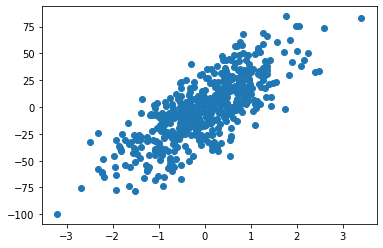

In [4]:
plt.scatter(x,y)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train ,x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
Linear_reg = LinearRegression()

In [9]:
Linear_reg.fit(x_train,y_train)

LinearRegression()

In [10]:
Linear_reg.coef_

array([24.96580541])

In [11]:
Linear_reg.intercept_

-2.368122920727285

In [12]:
m = Linear_reg.coef_[0]

In [13]:
m

24.965805407915756

In [14]:
b_from_sklearn  = Linear_reg.intercept_

In [15]:
m,b_from_sklearn

(24.965805407915756, -2.368122920727285)

In [16]:
np.mean(cross_val_score(Linear_reg,x_train,y_train,scoring="r2",cv = 10))

0.573333648281727

In [17]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 24.965805407915756
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    
    def model_fit(self,x,y):
        # calculate b using gradient descnet
        
        for i in range(self.epochs):
            
            loss_slope = -2* np.sum(y - self.m * x.ravel()- self.b)
            
            self.b = self.b - (self.lr * loss_slope)
#             print(loss_slope,self.b)
        print(self.b)
        
            
            
            
    

In [18]:
gd = GDRegressor(0.001,10)

In [19]:
gd.model_fit(x_train,y_train)

-2.3681349662314974


In [20]:
b_from_sklearn

-2.368122920727285

    (y-mx-b)^2

    y^2 + (mx)^2 + b^2 + 2(y)(-mx) + 2(-mx)(-b) + 2(y)(-b)

    y^2 + x^2.m^2 + b^2 - 2mx y + 2 mx b - 2y

    2b + 2mx 

    2(mx + b)


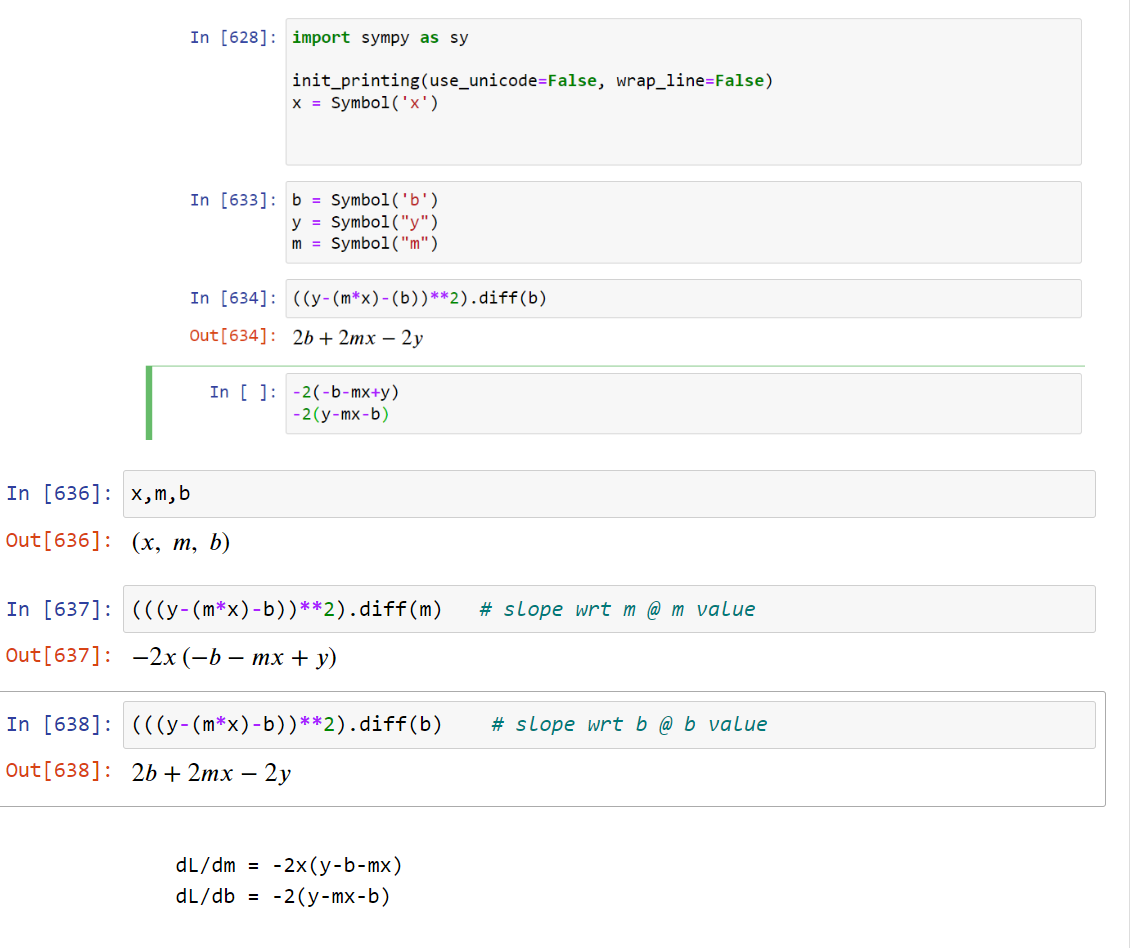

In [21]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    
    def model_fit(self,x,y):
        # calculate b using gradient descnet
        
        for i in range(self.epochs):
            
            loss_slope_wrt_b = -2* np.sum(y - self.m * x.ravel()- self.b)
            
            loss_slope_wrt_m = -2* np.sum((x.ravel()) * ( y -self.b - self.m * x.ravel() ))
            
            self.b = self.b - (self.lr * loss_slope_wrt_b)
            
            self.m = self.m - (self.lr * loss_slope_wrt_m)
            
            
#             print(loss_slope,self.b)
        print(self.b, self.m)
        
            
    def predict_function(self,x):
        return self.m * x + self.b
            
            
    

In [22]:
gd = GDRegressor(0.001,100)

In [23]:
gd.model_fit(x_train,y_train)

-2.3681229207272847 24.965805407915745


In [33]:
# gd.predict_function(x)

In [25]:
y_predict = Linear_reg.predict(x_test)

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test,y_predict)

0.5942968938353169

In [32]:
np.mean(cross_val_score(Linear_reg,x_train,y_train,scoring="r2",cv = 10))

0.573333648281727

In [29]:
y_predict = gd.predict_function(x_test)
r2_score(y_test,y_predict)

0.5942968938353169

In [68]:
b = -520
m = -600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(x.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * x[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * x[j]) -  b)*x[j]
        cost = cost + (y[j] - m * x[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

In [69]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


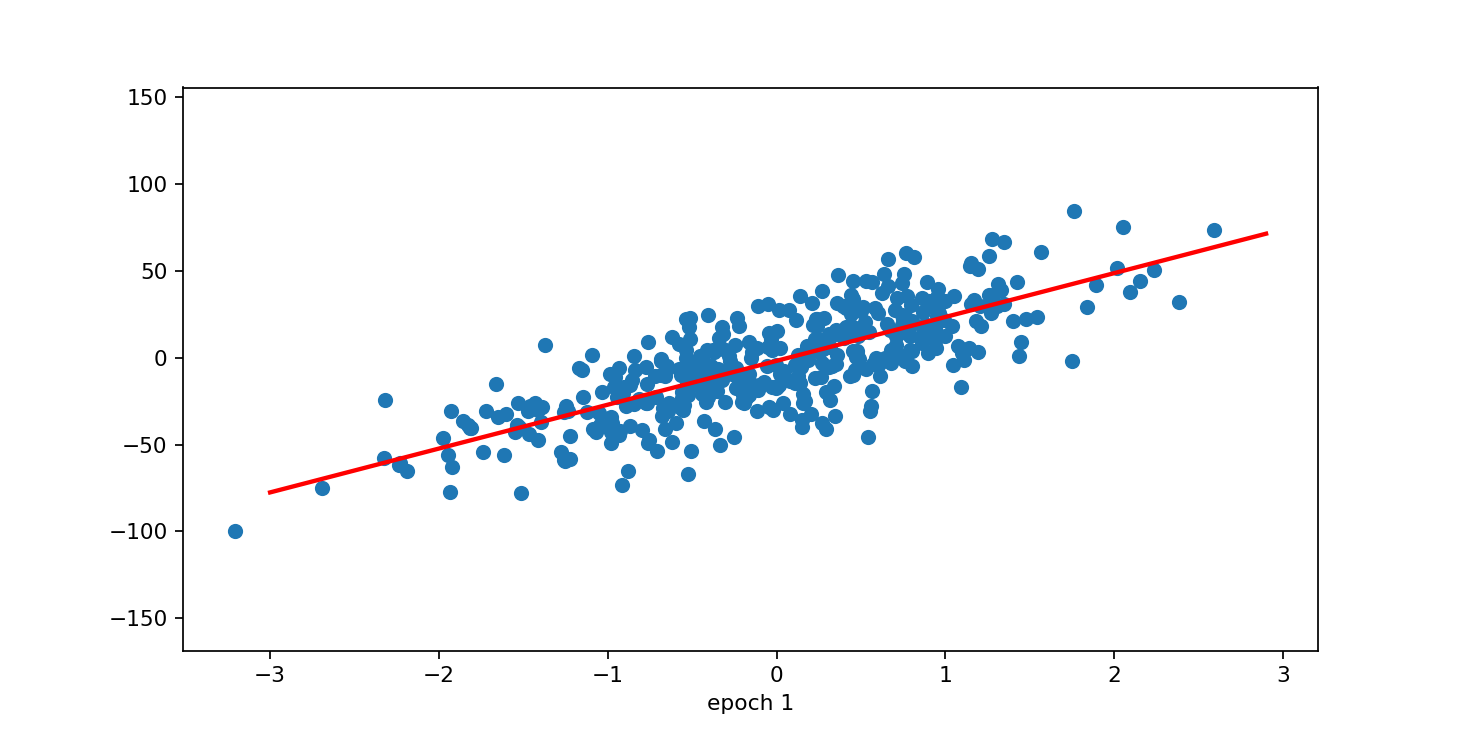

In [70]:

fig, ax = plt.subplots(figsize=(6,3))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(x_train, y_train)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)